In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
df = pd.read_csv("/content/aviakompaniya/train_dataset.csv")
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
test_data = pd.read_csv("/content/aviakompaniya/test_dataset.csv")
test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [7]:
df[df['Arrival Delay in Minutes'].isnull()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
142,143,Male,Loyal Customer,25,Business travel,Business,2685,2,2,2,...,4,4,4,4,5,5,5,175,NaN,1
277,278,Female,Loyal Customer,63,Business travel,Business,3104,3,2,3,...,4,4,4,4,4,4,3,0,NaN,1
281,282,Female,Loyal Customer,40,Business travel,Eco,1214,4,3,3,...,4,2,2,4,3,1,4,110,NaN,1
427,428,Male,Loyal Customer,70,Personal Travel,Eco,298,2,4,2,...,1,3,2,4,3,5,1,0,NaN,0
477,478,Female,Loyal Customer,8,Personal Travel,Business,842,3,5,3,...,3,2,5,4,5,1,3,5,NaN,0
481,482,Male,disloyal Customer,30,Business travel,Eco,737,4,4,4,...,2,5,1,4,1,3,2,22,NaN,0
531,532,Male,Loyal Customer,63,Personal Travel,Eco,436,3,5,3,...,1,5,2,5,3,4,1,64,NaN,0
1514,1515,Male,Loyal Customer,32,Business travel,Business,1737,3,2,2,...,3,1,4,4,1,3,3,42,NaN,0
2087,2088,Female,Loyal Customer,20,Business travel,Business,2370,2,2,2,...,3,5,4,5,3,5,3,60,NaN,1
2333,2334,Male,Loyal Customer,24,Personal Travel,Eco,2681,1,2,1,...,3,3,1,4,1,4,3,92,NaN,0


In [8]:
df[df['Departure Delay in Minutes']>100]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
43,44,Female,Loyal Customer,49,Business travel,Business,1704,1,1,1,...,3,3,4,5,4,5,4,138,134.0,1
67,68,Male,Loyal Customer,38,Business travel,Business,1121,5,5,5,...,4,1,5,1,4,3,4,269,260.0,1
92,93,Male,Loyal Customer,80,Business travel,Eco Plus,459,4,3,3,...,2,4,4,3,4,2,4,208,204.0,0
142,143,Male,Loyal Customer,25,Business travel,Business,2685,2,2,2,...,4,4,4,4,5,5,5,175,NaN,1
143,144,Female,Loyal Customer,34,Personal Travel,Eco,313,0,4,0,...,5,4,2,4,5,4,5,127,131.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,9917,Female,Loyal Customer,47,Business travel,Eco Plus,125,4,4,4,...,4,4,4,4,4,4,3,118,111.0,1
9931,9932,Female,Loyal Customer,40,Business travel,Business,2504,4,4,4,...,4,5,5,4,4,3,4,429,417.0,1
9953,9954,Male,Loyal Customer,51,Business travel,Eco,449,1,3,3,...,2,1,3,3,2,2,2,145,166.0,0
9971,9972,Male,disloyal Customer,22,Business travel,Business,1399,5,0,5,...,5,3,2,4,4,5,5,106,110.0,1


In [9]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [10]:
df['satisfaction'].value_counts()

0    5000
1    5000
Name: satisfaction, dtype: int64

In [11]:
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
dtype: float64

In [12]:
num_cols = [col for col in df.columns if df[col].dtype!='object' and df['satisfaction'].corr(df[col])>0.1]

In [13]:
num_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Ease of Online booking',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype=='object']

In [15]:
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [16]:
my_cols = cat_cols + num_cols

In [17]:
test_cols = my_cols.copy()
test_cols.remove('satisfaction')
test_cols

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Ease of Online booking',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [18]:
my_df = df[my_cols]
my_test_df = test_data[test_cols]

In [19]:
my_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  4000 non-null   object
 1   Customer Type           4000 non-null   object
 2   Type of Travel          4000 non-null   object
 3   Class                   4000 non-null   object
 4   Age                     4000 non-null   int64 
 5   Flight Distance         4000 non-null   int64 
 6   Inflight wifi service   4000 non-null   int64 
 7   Ease of Online booking  4000 non-null   int64 
 8   Food and drink          4000 non-null   int64 
 9   Online boarding         4000 non-null   int64 
 10  Seat comfort            4000 non-null   int64 
 11  Inflight entertainment  4000 non-null   int64 
 12  On-board service        4000 non-null   int64 
 13  Leg room service        4000 non-null   int64 
 14  Baggage handling        4000 non-null   int64 
 15  Chec

In [20]:
encoded = pd.get_dummies(my_df)
test_encoded = pd.get_dummies(my_test_df)

In [21]:
test_encoded.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Cleanliness,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,25,2704,2,2,2,3,5,2,4,4,...,5,1,0,1,0,0,1,0,1,0
1,49,1623,1,1,3,4,4,2,2,2,...,3,1,0,1,0,1,0,1,0,0
2,51,338,4,4,2,5,5,5,5,5,...,4,0,1,1,0,1,0,1,0,0
3,34,95,0,0,5,0,1,5,4,4,...,5,0,1,1,0,1,0,0,0,1
4,34,602,4,4,4,5,5,5,4,5,...,5,0,1,1,0,0,1,0,1,0


In [22]:
X = encoded.drop('satisfaction', axis=1)
y = encoded['satisfaction']

In [23]:
X.shape

(10000, 23)

In [24]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: satisfaction, dtype: int64

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(test_encoded)
y_train = y
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=48)

In [31]:
X_test

array([[-0.96495221,  1.44237851, -0.57254957, ..., -1.00964653,
         1.16292204, -0.27456229],
       [ 0.64608723,  0.38488743, -1.30639932, ...,  0.99044564,
        -0.85990287, -0.27456229],
       [ 0.78034051, -0.87216719,  0.89514992, ...,  0.99044564,
        -0.85990287, -0.27456229],
       ...,
       [-0.09230585, -0.6139085 , -0.57254957, ..., -1.00964653,
         1.16292204, -0.27456229],
       [-1.09920549, -0.24608551,  1.62899967, ..., -1.00964653,
         1.16292204, -0.27456229],
       [-0.96495221, -0.14043423,  0.16130017, ..., -1.00964653,
         1.16292204, -0.27456229]])

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1006
           1       0.86      0.86      0.86       994

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Model aniqligi: 0.8585


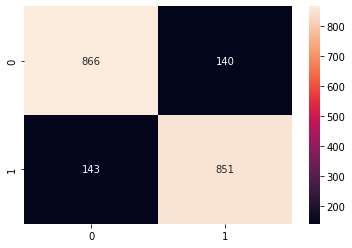

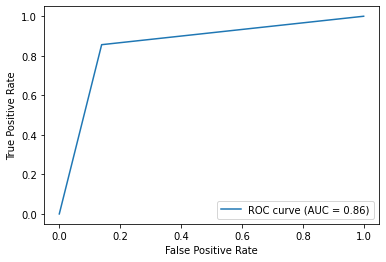

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1006
           1       0.94      0.93      0.94       994

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.936


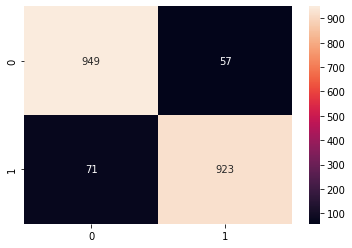

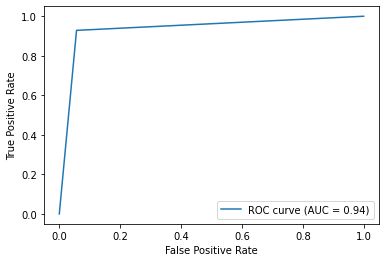

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1006
           1       0.92      0.93      0.92       994

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Model aniqligi: 0.924


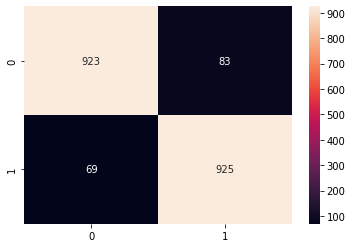

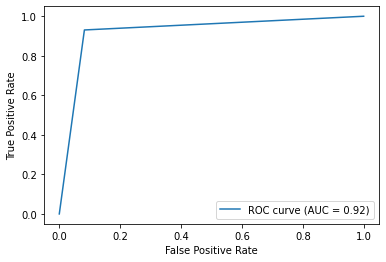

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
RF_model = RandomForestClassifier(n_estimators=16)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
# print(metrics.classification_report(y_test, y_pred))
# print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

# ## confusion matrix
# conf_mat = metrics.confusion_matrix(y_test, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# ## ROC curve
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

In [ ]:
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
yechim = pd.DataFrame(y_pred)
yechim.columns = ['satisfaction']
yechim['id'] = np.arange(1, 4001)
yechim.index = yechim['id']
yechim.drop(['id'], axis=1, inplace=True)
yechim.head()


,satisfaction
id,
1,0
2,1
3,1
4,1
5,0


In [ ]:
yechim.to_csv('yechim.csv')

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1006
           1       0.95      0.94      0.94       994

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.941


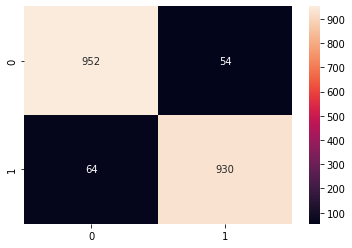

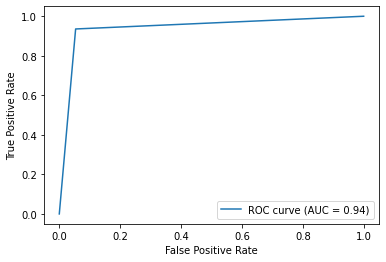

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

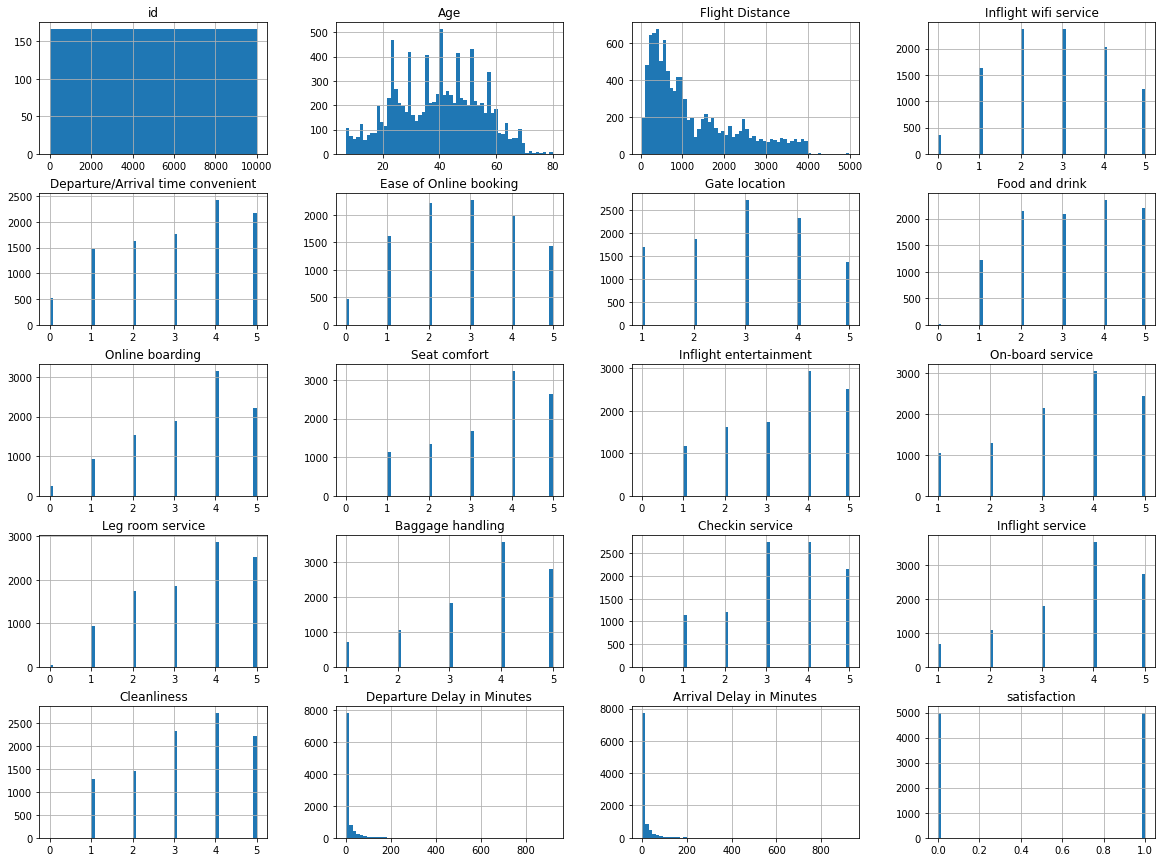

In [ ]:
%matplotlib inline
df.hist(bins=60, figsize=(20,15))
plt.show()

In [ ]:
df1 = df.dropna()
data = df1.drop('id', axis=1)
encoded_data = pd.get_dummies(data)

In [ ]:
encoded_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,33,571,2,3,2,4,4,2,4,4,...,0,0,1,0,1,1,0,0,1,0
1,49,1431,4,1,4,4,3,5,4,5,...,1,1,0,1,0,1,0,1,0,0
2,43,867,1,4,4,4,4,4,3,1,...,0,1,0,1,0,1,0,0,1,0
3,27,1550,3,3,3,3,2,2,2,2,...,1,1,0,1,0,1,0,1,0,0
4,11,526,3,4,3,2,4,3,4,4,...,0,0,1,1,0,0,1,0,1,0


In [ ]:
X1 = encoded.drop('satisfaction', axis=1)
y1 = encoded['satisfaction']
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.8, test_size=0.2, random_state=48)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1006
           1       0.94      0.94      0.94       994

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.942


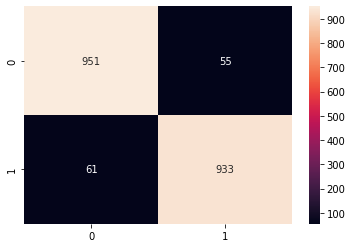

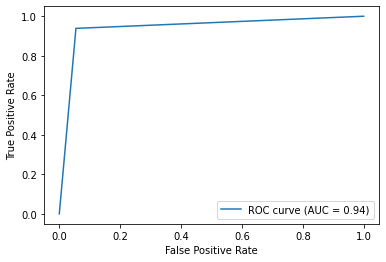

In [ ]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train1, y_train1)

# Modelni baholaymiz
y_pred1 = RF_model.predict(X_test1)
print(metrics.classification_report(y_test1, y_pred1))
print("Model aniqligi:", metrics.accuracy_score(y_test1,y_pred1))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test1, y_pred1)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [27]:
from catboost import CatBoostClassifier

In [42]:
model = CatBoostClassifier(
    iterations=150,
    random_seed=63,
    learning_rate=0.1,
    custom_loss=['Accuracy'],
    eval_metric='Accuracy' 
)

## when you fit the model with parameter plot=True, you can see how your model is training (it is fun!)
model.fit(
    X_train, y_train
)

0:	learn: 0.8865000	total: 13ms	remaining: 1.93s
1:	learn: 0.9003000	total: 29.9ms	remaining: 2.22s
2:	learn: 0.8987000	total: 48.2ms	remaining: 2.36s
3:	learn: 0.9198000	total: 61.9ms	remaining: 2.26s
4:	learn: 0.9252000	total: 81.6ms	remaining: 2.37s
5:	learn: 0.9293000	total: 96.1ms	remaining: 2.31s
6:	learn: 0.9279000	total: 114ms	remaining: 2.33s
7:	learn: 0.9321000	total: 130ms	remaining: 2.3s
8:	learn: 0.9366000	total: 136ms	remaining: 2.14s
9:	learn: 0.9360000	total: 142ms	remaining: 1.99s
10:	learn: 0.9359000	total: 156ms	remaining: 1.97s
11:	learn: 0.9391000	total: 173ms	remaining: 1.99s
12:	learn: 0.9402000	total: 192ms	remaining: 2.03s
13:	learn: 0.9406000	total: 214ms	remaining: 2.08s
14:	learn: 0.9413000	total: 221ms	remaining: 1.99s
15:	learn: 0.9424000	total: 228ms	remaining: 1.91s
16:	learn: 0.9429000	total: 235ms	remaining: 1.83s
17:	learn: 0.9435000	total: 241ms	remaining: 1.76s
18:	learn: 0.9443000	total: 247ms	remaining: 1.7s
19:	learn: 0.9440000	total: 253ms	remai

In [43]:
preds = model.predict(X_test)

In [44]:
preds

array([0, 1, 1, ..., 0, 1, 0])

In [45]:
yechim = pd.DataFrame(preds)
yechim.columns = ['satisfaction']
yechim['id'] = np.arange(1, 4001)
yechim.index = yechim['id']
yechim.drop(['id'], axis=1, inplace=True)
yechim.head()

,satisfaction
id,
1,0
2,1
3,1
4,1
5,0


In [46]:
yechim.to_csv('yechim.csv')

In [36]:
yechim.shape

(4000, 1)